1) Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

2) Loading, viewing the Dataset and  dropping rows with empty values

In [2]:
df = sns.load_dataset('penguins')

df = df.dropna(axis = 0)

3) Selecting features and converting into numpy array

In [3]:
X = np.asarray(df[['bill_length_mm','flipper_length_mm']])

4) Computing inertia for each number of cluster using for loops

C:\Users\Nael\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


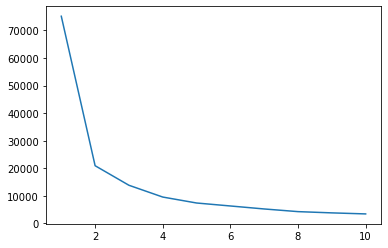

In [4]:
inertia = []

for a in range (1,11):
    cluster = KMeans (n_clusters = a)
    cluster.fit(X)
    inertia.append (cluster.inertia_)

k = list(range(1,11))

sns.lineplot(x = k , y =inertia)
plt.show()


         

5) printing inertia values and locating the elbow point

In [5]:
from kneed import KneeLocator


kl = KneeLocator(
    range(1, 11), inertia, curve="convex", direction="decreasing"
)

kl.elbow

2

6) Running K-Mean with optimum number of K and  assign aach row of the dataframe to a cluster 

In [6]:
clustering = KMeans (n_clusters = 2)

clustering.fit(X)

KMeans(n_clusters=2)

In [7]:
df['cluster'] = clustering.labels_
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,1


7) Vizualizing clusters

Text(0.5, 1.0, ' with cluster')

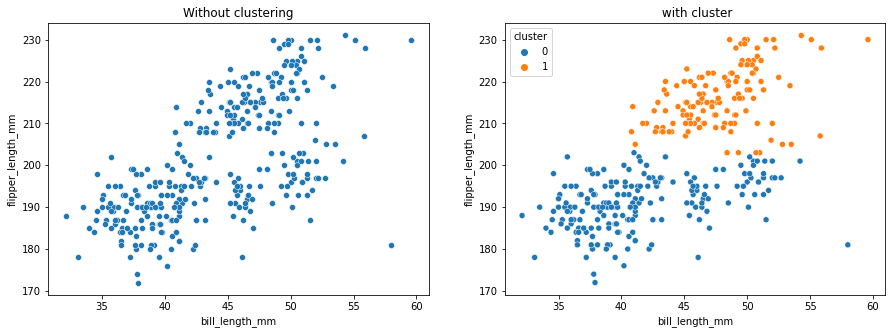

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='bill_length_mm', y='flipper_length_mm').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='bill_length_mm', y='flipper_length_mm',hue='cluster').set_title(" with cluster")